In [1]:
# Importing General Purpose Libraries
import numpy as np
import matplotlib.pylab as plt
import random

In [2]:
%matplotlib inline

In [3]:
random.seed(10)
np.random.seed(10)

In [4]:
w0 = random.uniform(-0.25, 0.25)
w1 = random.uniform(-1, 1)
w2 = random.uniform(-1, 1)

weightVector = [w0, w1, w2]
print ('Initially selected weights are {}'.format(weightVector))

Initially selected weights are [0.03570129734495675, -0.14222189064977075, 0.15618260226894076]


In [5]:
n = 100
S = []
for x in range(n):
    S.append([random.uniform(-1, 1), random.uniform(-1, 1)])
S0 = []
S1 = []

for x in range(0, len(S)):
    result = 1*w0 + S[x][0]*w1 + S[x][1]*w2
    
    if result >= 0:
        sample = [S[x][0]] + [S[x][1]] + [0]
        S1.append(sample)
    else:
        sample = [S[x][0]] + [S[x][1]] + [1]
        S0.append(sample)
        
inputSample = S1 + S0

No handles with labels found to put in legend.


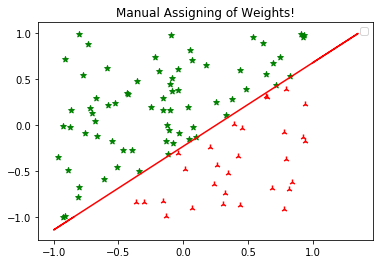

In [6]:
S1Plot = []
S2Plot = []
S1 = []
S2 = []

for x in S:
    result = np.matmul(np.array([1.0, x[0], x[1]]), np.transpose(weightVector))
    if result >= 0:
        S1Plot.append(x)
        x = np.append(x, 1.0)
        S1.append(x)
    else:
        S2Plot.append(x)
        x = np.append(x, 0.0)
        S2.append(x)

# Converting S1 and S2 as Numpy arrays
S1 = np.array(S1)
S2 = np.array(S2)

# For plotting the points and the line
S1Plot = np.array(S1Plot)
S2Plot = np.array(S2Plot)
S1x, S1y = S1Plot.T
S2x, S2y = S2Plot.T
 
# For the separating line, we have to solve the equation
# If x1 = 1
point1 = [1]
x2 = -(w0 + w1)/w2
point1.append(x2)

# If x2 = 1
point2 = [1]
x1 = -(w0 + w2)/w1
point2 = [x1] + point2

# If x1 = -1
point3 = [-1]
x2 = (w1-w0)/w2
point3.append(x2)

# If x2 = -1
point4 = [-1]
x1 = (w2-w0)/w1
point4 = [x1] + point4

linePoints = [point1, point2, point3, point4]
linePoints = np.array(linePoints)
lineX, lineY = linePoints.T

plt.title('Manual Assigning of Weights!')
plt.legend(loc="upper right")
plt.scatter(S1x, S1y, c='g', marker='*', label='S1')
plt.scatter(S2x, S2y, c='r', marker='2', label='S0')
plt.plot(lineX, lineY, color='red', label='Separating Line')
plt.show(True)

In [12]:
random.seed(10)
w0Prime = random.uniform(-1, 1)
w1Prime = random.uniform(-1, 1)
w2Prime = random.uniform(-1, 1)
weightPrimeVector = [w0Prime, w1Prime, w2Prime]
print(weightPrimeVector)

[0.142805189379827, -0.14222189064977075, 0.15618260226894076]


In [8]:
def numberOfMisclassified(inputSample, weightPrimeVector):
    
    number = 0
    
    for x in range(0, len(inputSample)):
        result = weightPrimeVector[0] + inputSample[x][0]*weightPrimeVector[1] + inputSample[x][1]*weightPrimeVector[2]
        
        if result >= 0:
            y = 1
        else:
            y = 0
            
        if y == inputSample[x][2]:
            pass
        else:
            number += 1
            
    return number

In [9]:
numberMisclassifications = numberOfMisclassified(inputSample, weightPrimeVector)
print("Number of samples that were misclassified with the new weights are {}".format(numberMisclassifications))

Number of samples that were misclassified with the new weights are 82


In [10]:
def perceptronTrainingAlgorithm(omega, learningRate, inputSample):
    
    epoch = 0
    omegas = []
    missed = []
    
    while (numberOfMisclassified(inputSample, omega) != 0):
        
        missed.append(numberOfMisclassified(inputSample, omega))
        epoch += 1
        
        for x in range(0, len(inputSample)):
            
            #result = np.matmul(np.array([1]+[inputSample[x][0]]+[inputSample[x][1]]), np.array(omega))
            result = omega[0] + (inputSample[x][0]*omega[1]) + (inputSample[x][1]*omega[2])
            
            if result >= 0:
                y = 1
            else:
                y = 0
               
            modification = [1] + inputSample[x][0:2]
            actual = inputSample[x][2]
            
            difference = actual - y
            
            if difference != 0:
                for x in range(3):
                    modification[x] = modification[x]*learningRate*difference
                    omega[x] = omega[x] + modification[x]
                    
        omegas.append(omega)
    finalMisclassifications = numberOfMisclassified(inputSample, omega)
    
    return omegas, missed
            
            

Initial Weights : [-1.857194810620173, 7.4494602334554685, -8.176616442447566]


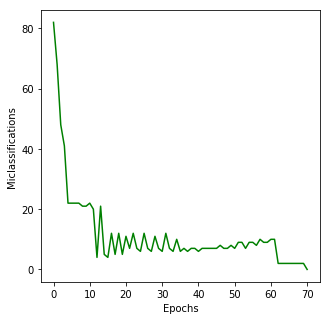

In [11]:
eta = 1
finalWeights = []
finalWeights, missed = perceptronTrainingAlgorithm(weightPrimeVector, eta, inputSample)

print("Initial Weights : {}".format(weightPrimeVector))
nEpochs = range(len(finalWeights)+1)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nEpochs, missed+[0], c = 'green')

plt.ylabel('Miclassifications')
plt.xlabel('Epochs')
plt.show(True)

Initial Weights : [-0.05719481062017301, 0.23017432648154473, -0.2621911429256683]


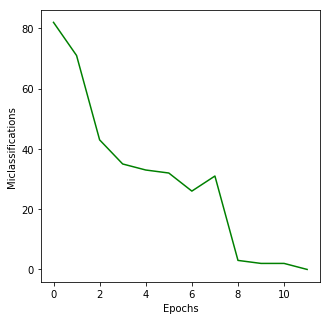

In [11]:
eta = 0.1
finalWeights = []
finalWeights, missed = perceptronTrainingAlgorithm(weightPrimeVector, eta, inputSample)

print("Initial Weights : {}".format(weightPrimeVector))

nEpochs = range(len(finalWeights)+1)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nEpochs, missed+[0], c = 'green')

plt.ylabel('Miclassifications')
plt.xlabel('Epochs')
plt.show(True)

Initial Weights : [-19.85719481062017, 75.79975576547463, -84.75423242565707]


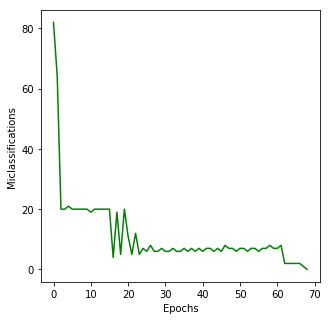

In [11]:
eta = 10
finalWeights = []
finalWeights, missed = perceptronTrainingAlgorithm(weightPrimeVector, eta, inputSample)

print("Initial Weights : {}".format(weightPrimeVector))

nEpochs = range(len(finalWeights)+1)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nEpochs, missed+[0], c = 'green')

plt.ylabel('Miclassifications')
plt.xlabel('Epochs')
plt.show(True)